In [1]:
!pip install konlpy
# !pip install customized_konlpy
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
# from ckonlpy.tag import Twitter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.9 MB/s eta 0:00:00


In [6]:
from google.colab import files
# myfile = files.upload()
import io
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
# filename2 = '/content/drive/MyDrive/보석십자수2021-07-06.csv'
filename1='/content/drive/MyDrive/Colab Notebooks/ai project/dataset/감성분석v1.csv'
# filename1='/content/drive/MyDrive/Colab Notebooks/ai project/dataset/cus_data.csv'

train_data = pd.read_csv(filename1)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train_data

,sentence,label
0,코로나 때문에 뭘 할 수가 없어. 취직 준비를 해야 하는데 시험이 줄줄이 취소되니 ...,슬픔
1,오늘 회사에서 큰 실수를 한 것 같아.,슬픔
2,요즘 취업 관련해서 떠올리기만 해도 온몸이 마비될 것 같아.,슬픔
3,어제도 야근 오늘도 야근이야. 너무 힘들어.,슬픔
4,직장 생활 육 개월 차인데 아직도 적응하기가 힘들어. 사회생활이 이렇게 괴롭고 슬픈...,슬픔
...,...,...
57858,진짜 이러면 안되는거 아는데애기 아빠가 연락이 안되요,당황
57859,이게 평생갈까봐 고민이네요;0,당황
57860,안그러는게 정상 맞죠??0,당황
57861,다른 고무신들은 헤어지고 연락이 오나요?..,당황


In [8]:
train_data.rename(columns = {'sentecne' : 'sentence'}, inplace = True)

In [9]:
train_data= train_data[['sentence','label']]

In [10]:
train_data

,sentence,label
0,코로나 때문에 뭘 할 수가 없어. 취직 준비를 해야 하는데 시험이 줄줄이 취소되니 ...,슬픔
1,오늘 회사에서 큰 실수를 한 것 같아.,슬픔
2,요즘 취업 관련해서 떠올리기만 해도 온몸이 마비될 것 같아.,슬픔
3,어제도 야근 오늘도 야근이야. 너무 힘들어.,슬픔
4,직장 생활 육 개월 차인데 아직도 적응하기가 힘들어. 사회생활이 이렇게 괴롭고 슬픈...,슬픔
...,...,...
57858,진짜 이러면 안되는거 아는데애기 아빠가 연락이 안되요,당황
57859,이게 평생갈까봐 고민이네요;0,당황
57860,안그러는게 정상 맞죠??0,당황
57861,다른 고무신들은 헤어지고 연락이 오나요?..,당황


# 새 섹션

In [11]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 57863


In [12]:
train_data[:5] # 상위 5개 출력

,sentence,label
0,코로나 때문에 뭘 할 수가 없어. 취직 준비를 해야 하는데 시험이 줄줄이 취소되니 ...,슬픔
1,오늘 회사에서 큰 실수를 한 것 같아.,슬픔
2,요즘 취업 관련해서 떠올리기만 해도 온몸이 마비될 것 같아.,슬픔
3,어제도 야근 오늘도 야근이야. 너무 힘들어.,슬픔
4,직장 생활 육 개월 차인데 아직도 적응하기가 힘들어. 사회생활이 이렇게 괴롭고 슬픈...,슬픔


In [13]:
train_data['label'].unique()#, train_data['Blogger'].nunique()

array(['슬픔', '기쁨', '분노', '당황'], dtype=object)

In [14]:
from pandas.core.groupby.generic import Mapping
# def is_nan(x):
#     return (x != x)

# num=-1
# for i in train_data['AD']:
#   num+=1
#   if is_nan(i):
#     train_data['AD'][num]=0
#   else:
#     train_data['AD'][num]=1
# num=-1

mapping={'슬픔':0, '기쁨':1, '분노':2, '당황':3}
train_data['label'] = train_data.label.map(mapping)

# for i in test_data['AD']:
#   num+=1
#   if is_nan(i):
#     test_data['AD'][num]=0
#   else:
#     test_data['AD'][num]=1
train_data[:5]

,sentence,label
0,코로나 때문에 뭘 할 수가 없어. 취직 준비를 해야 하는데 시험이 줄줄이 취소되니 ...,0
1,오늘 회사에서 큰 실수를 한 것 같아.,0
2,요즘 취업 관련해서 떠올리기만 해도 온몸이 마비될 것 같아.,0
3,어제도 야근 오늘도 야근이야. 너무 힘들어.,0
4,직장 생활 육 개월 차인데 아직도 적응하기가 힘들어. 사회생활이 이렇게 괴롭고 슬픈...,0


<Axes: >

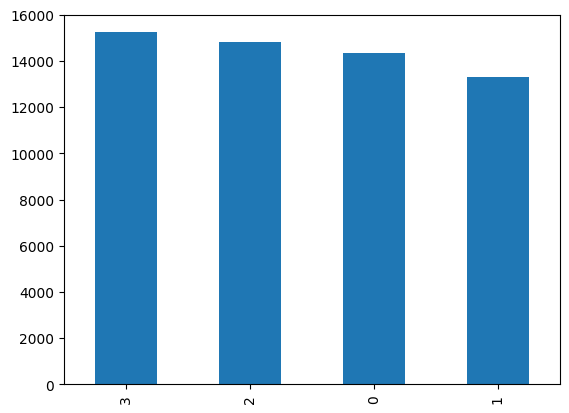

In [15]:
train_data.drop_duplicates(subset=['sentence'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
train_data['label'].value_counts().plot(kind = 'bar')
# test_data['AD'].value_counts().plot(kind = 'bar')

In [16]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  14370
1      1  13329
2      2  14820
3      3  15241


In [17]:
print(train_data.isnull().values.any())

False


In [18]:
train_data['sentence'] = train_data['sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 한글과 공백을 제외하고 모두 제거
train_data[:5]

<ipython-input-18-39c89c248191>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['sentence'] = train_data['sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,sentence,label
0,코로나 때문에 뭘 할 수가 없어 취직 준비를 해야 하는데 시험이 줄줄이 취소되니 말...,0
1,오늘 회사에서 큰 실수를 한 것 같아,0
2,요즘 취업 관련해서 떠올리기만 해도 온몸이 마비될 것 같아,0
3,어제도 야근 오늘도 야근이야 너무 힘들어,0
4,직장 생활 육 개월 차인데 아직도 적응하기가 힘들어 사회생활이 이렇게 괴롭고 슬픈 ...,0


In [19]:
train_data['sentence'] = train_data['sentence'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['sentence'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())
train_data.dropna(axis=0,inplace=True)
print(train_data.isnull().sum())


sentence    2
label       0
dtype: int64
sentence    0
label       0
dtype: int64


<ipython-input-19-62a26ca7ac28>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['sentence'] = train_data['sentence'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [20]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt=Okt()
# okt.add_dictionary('내돈내산', 'Noun')
# okt.add_dictionary('내돈', 'Noun')
# okt.add_dictionary('내산', 'Noun')
# okt.add_dictionary('리얼', 'Noun')
# okt.add_dictionary('리뷰', 'Noun')
# okt.add_dictionary('집순이', 'Noun')

X_train = []
for sentence in train_data['sentence']:
    temp_X = okt.morphs(sentence,stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [21]:
print(X_train[:3])
print(len(X_train))

[['코로나', '때문', '뭘', '수가', '없다', '취직', '준비', '시험', '줄줄이', '취소', '되다', '말', '이야', '마비', '라는', '말', '이렇다', '때', '차다', '어울리다', '것', '같다'], ['오늘', '회사', '에서', '크다', '실수', '것', '같다'], ['요즘', '취업', '관련', '떠올리다', '해도', '온몸', '마비', '되다', '것', '같다']]
57758


In [22]:
from sklearn.model_selection import train_test_split
y_train = train_data[['label']]

X_train, X_test,y_train,y_test = train_test_split(X_train,y_train,train_size=0.8)

In [23]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

46206
11552
46206
11552


In [24]:
# X_test = []
# from sklearn.model_selection import train_test_split
# new_X_train, new_X_test = train_test_split(X_train,X_test,train_size=0.8)
# for sentence in test_data['Post']:
#     temp_X = okt.morphs(sentence, stem=True) # 토큰화
#     temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
#     X_test.append(temp_X)

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [26]:
print(tokenizer.word_index)

{'을': 1, '너무': 2, '나': 3, '내': 4, '있다': 5, '같다': 6, '친구': 7, '것': 8, '없다': 9, '보다': 10, '에서': 11, '못': 12, '안': 13, '되다': 14, '좋다': 15, '않다': 16, '들다': 17, '만': 18, '사람': 19, '정말': 20, '로': 21, '받다': 22, '다': 23, '에게': 24, '오늘': 25, '게': 26, '일': 27, '하고': 28, '돼다': 29, '말': 30, '슬프다': 31, '이야': 32, '싶다': 33, '고': 34, '가다': 35, '요즘': 36, '생각': 37, '때': 38, '때문': 39, '돈': 40, '힘들다': 41, '회사': 42, '우리': 43, '자다': 44, '아내': 45, '한테': 46, '모르다': 47, '남편': 48, '오다': 49, '많이': 50, '스럽다': 51, '나다': 52, '수': 53, '나르다': 54, '이번': 55, '더': 56, '부모님': 57, '거': 58, '이다': 59, '아니다': 60, '먹다': 61, '나오다': 62, '이제': 63, '마음': 64, '어떻다': 65, '되어다': 66, '그렇다': 67, '화가': 68, '적': 69, '아프다': 70, '결혼': 71, '엄마': 72, '많다': 73, '나이': 74, '집': 75, '난': 76, '왜': 77, '진짜': 78, '그': 79, '걱정': 80, '랑': 81, '해': 82, '지금': 83, '가족': 84, '직장': 85, '주다': 86, '자식': 87, '요': 88, '인데': 89, '인': 90, '아들': 91, '기분': 92, '당황': 93, '까지': 94, '기쁘다': 95, '해주다': 96, '전': 97, '알다': 98, '날': 99, '아이': 100, '학교': 101, '당하다': 102,

In [27]:
sorted_dict = sorted(tokenizer.word_counts.items(), key = lambda item: item[1])

In [28]:
mylist = [0,0,0,0,0,0]
mylist[0] += 1
mylist

[1, 0, 0, 0, 0, 0]

In [29]:
train_data['label'].value_counts()

3    15240
2    14820
0    14370
1    13328
Name: label, dtype: int64

In [30]:
# final_list=[]
# sorteddict = sorted_dict[-100:]
# # train_data
# # X_train
# for i in range(len(sorteddict)):
#   mylist = [0,0,0,0,0,0,0]
#   token_index = sorteddict[i][0]
#   token = tokenizer.word_index[token_index]
#   # print(token_index,token)
#   for j in range(38506):
#     if token in X_train[j]:
#       try:
#         # print(train_data['label'][j])
#         mylist[train_data['label'][j]] = mylist[train_data['label'][j]]+ 1
#       except:
#         # print('pass')
#         pass
#   mylist.append(token_index)
#   # print(mylist,token_index)
#   final_list.append(mylist)


In [31]:
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic') 
# for mylist in final_list:
#   x = np.arange(7)
#   years = ['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']
#   # values = [100, 400, 900]
#   plt.title(mylist[-1])
#   plt.bar(x, mylist[:-1])
#   plt.xticks(x, years)

#   plt.show()
#   plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+mylist[-1]+'.png')

In [32]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 17824
등장 빈도가 2번 이하인 희귀 단어의 수: 10058
단어 집합에서 희귀 단어의 비율: 56.429533213644525
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.892539039907461


In [33]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7767


In [34]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

In [35]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [36]:
print(X_train[:3])

[[48, 91, 18, 554, 130, 693, 768, 22, 26, 380, 231, 130, 2, 888], [4, 602, 641, 5, 1227, 3, 10, 2716, 561, 44, 22, 343], [55, 86, 5515, 2717, 13, 1333, 14, 8, 6, 196, 59, 1576, 94, 195, 777, 2, 41, 210, 22]]


In [37]:
from keras.utils import np_utils

# y_train = np.asarray(train_data['label']).astype(float)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# y_test = np.asarray(test_data['AD']).astype(int)
# y_train = np.random.rand(845,1)
# y_train = np.around(y_train)

In [38]:
print(y_train[:3])

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [39]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [40]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [41]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

46180
46180


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 75
리뷰의 평균 길이 : 9.089367691641403


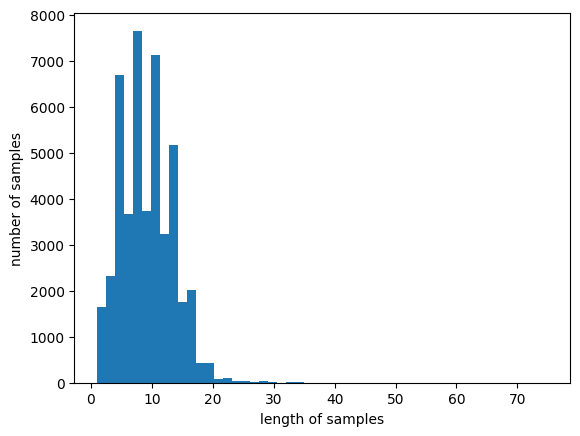

In [42]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [43]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [46]:
max_len = 32
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 32 이하인 샘플의 비율: 100.0


In [47]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [48]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [49]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128,dropout=0.2, recurrent_dropout=0.2))
# model.add(LSTM(128))
model.add(Dense(4, activation='softmax'))

In [50]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10,
                    callbacks=[es, mc],
                    batch_size=128,
                    validation_split=0.1
                    )

Epoch 1/10
325/325 [==============================] - ETA: 0s - loss: 0.9874 - acc: 0.5826
Epoch 1: val_loss improved from inf to 0.81808, saving model to best_model.h5
325/325 [==============================] - 66s 178ms/step - loss: 0.9874 - acc: 0.5826 - val_loss: 0.8181 - val_acc: 0.6637
Epoch 2/10
325/325 [==============================] - ETA: 0s - loss: 0.7483 - acc: 0.6985
Epoch 2: val_loss improved from 0.81808 to 0.81358, saving model to best_model.h5
325/325 [==============================] - 42s 129ms/step - loss: 0.7483 - acc: 0.6985 - val_loss: 0.8136 - val_acc: 0.6585
Epoch 3/10
325/325 [==============================] - ETA: 0s - loss: 0.6871 - acc: 0.7260
Epoch 3: val_loss did not improve from 0.81358
325/325 [==============================] - 39s 121ms/step - loss: 0.6871 - acc: 0.7260 - val_loss: 0.8292 - val_acc: 0.6585
Epoch 4/10
325/325 [==============================] - ETA: 0s - loss: 0.6452 - acc: 0.7429
Epoch 4: val_loss did not improve from 0.81358
325/325 [=

In [52]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

361/361 [==============================] - 4s 10ms/step - loss: 0.8164 - acc: 0.6695

 테스트 정확도: 0.6695


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

predict = loaded_model.predict(X_test)

y_pred = np.argmax(predict, axis=-1)
y_true=np.argmax(y_test, axis=-1)
# y_true
# print(confusion_matrix(y_test, predict))


361/361 [==============================] - 4s 9ms/step


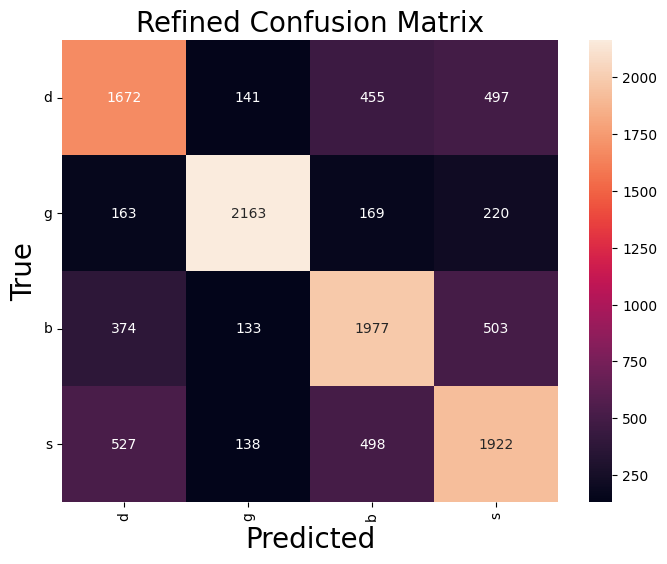

In [54]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
labels =  {"s", "d", "g", "b"}
class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

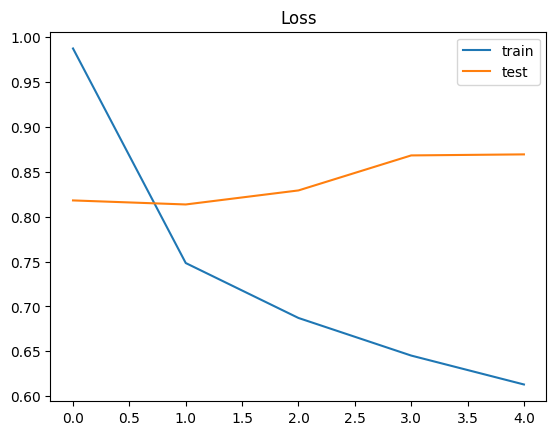

In [55]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();